<a href="https://colab.research.google.com/github/kittychenn/datathon-4/blob/main/17_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Datathon 4
**Team 17**: Jingwen Ji(1006128101), Brenleigh Jebb (1010718751), Kitty Chen (1007560710)

**Date**: 11/14/23

**Research Questions**:

1) Can we predict mortality using demographics, APACHE, laboratory and vital data?

2) Can a subset of features (demographic and APACHE) be used to allow for a simpler model prediction? If so, how do the two models compare?

#Exploratory Analysis

In [ ]:
# Import Libraries
from google.colab import files
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import dataset for Brenleigh
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df= pd.read_csv('/content/drive/MyDrive/ML_Course/datathon4.csv')
print(df.head())


In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['datathon4.csv']))

#Ensure correct dataset is being inputted
df.head()

Saving datathon4.csv to datathon4.csv


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
print(df.shape)
print(df.info())
print(df.isna().sum())
print(df.describe(include='all'))

(91713, 186)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB
None
encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64
         encounter_id     patient_id   hospital_id  hospital_death  \
count    91713.000000   91713.000000  91713.000000    91713.000000   
unique            NaN            NaN           NaN             NaN   
top               NaN            NaN           NaN             NaN   
freq              NaN            NaN           NaN             NaN   
mean     6

In [ ]:
# Set the maximum number of rows and columns to display so we can see all of the data
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [ ]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 91713
Number of columns: 186


In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = df.isnull().sum()
missing_value_counts

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [ ]:
# Create a function to select veriables with a certain number of missing values
#selected for variables with 50% or more missing data
def variables_with_missing_values(df, threshold):
    """
    Returns a list of variables with more than 'threshold' missing values in the DataFrame.

    Parameters:
    - df: Pandas DataFrame
    - threshold: Minimum number of missing values for a variable to be included in the list.

    Returns:
    - List of variable names with more than 'threshold' missing values.
    """
    missing_value_counts = df.isnull().sum()
    variables_with_missing = missing_value_counts[missing_value_counts > threshold].index.tolist()
    return variables_with_missing

variables = variables_with_missing_values(df, threshold=45856)  # Adjust the threshold as needed. 45856 is 50% missing data

print("Variables with more than 45856 missing values:")
print(variables)


Variables with more than 45856 missing values:
['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_ma

In [ ]:
# Remove the selected variables from the DataFrame
df_cleaned = df.drop(variables, axis=1)
df_cleaned.shape

(91713, 112)

Note that some of the veriables in the data dictionary are not in the data set, or at least not with the same name.
Like "pred"

In [ ]:
from re import I
# Categorizing Columns with variables not removed

target_column = ['hospital_death']

numerical_columns = ["age", "height", "pre_icu_los_days", "weight", "bun_apache", "creatinine_apache", "glucose_apache", "heart_rate_apache", "hematocrit_apache", "map_apache", "resprate_apache", "sodium_apache", "temp_apache", "wbc_apache", "d1_diasbp_max", "d1_diasbp_min", "d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min", "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_min", "d1_mbp_noninvasive_max", "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_resprate_min", "d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min", "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", "d1_temp_min", "h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min", "h1_heartrate_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_min", "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_resprate_min", "h1_spo2_max", "h1_spo2_min", "h1_sysbp_max", "h1_sysbp_min", "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "h1_temp_max", "h1_temp_min", "d1_calcium_max", "d1_calcium_min", "d1_glucose_max", "d1_glucose_min", "d1_hco3_max", "d1_hco3_min", "d1_hemaglobin_max", "d1_hemaglobin_min", "d1_hematocrit_max", "d1_hematocrit_min", "d1_platelets_max", "d1_platelets_min", "d1_potassium_max", "d1_potassium_min", "d1_sodium_max", "d1_sodium_min", "d1_wbc_max", "d1_wbc_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob",
]

binary_colums = ["elective_surgery", "readmission_status", "apache_post_operative", "arf_apache", "gcs_unable_apache", "intubated_apache", "ventilated_apache", "aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]

integer_columns = ["encounter_id", "hospital_id", "patient_id", "icu_id"]
string_columns = [i for i in df_cleaned.columns if i not in integer_columns + target_column + binary_colums + numerical_columns]

IndexError: ignored

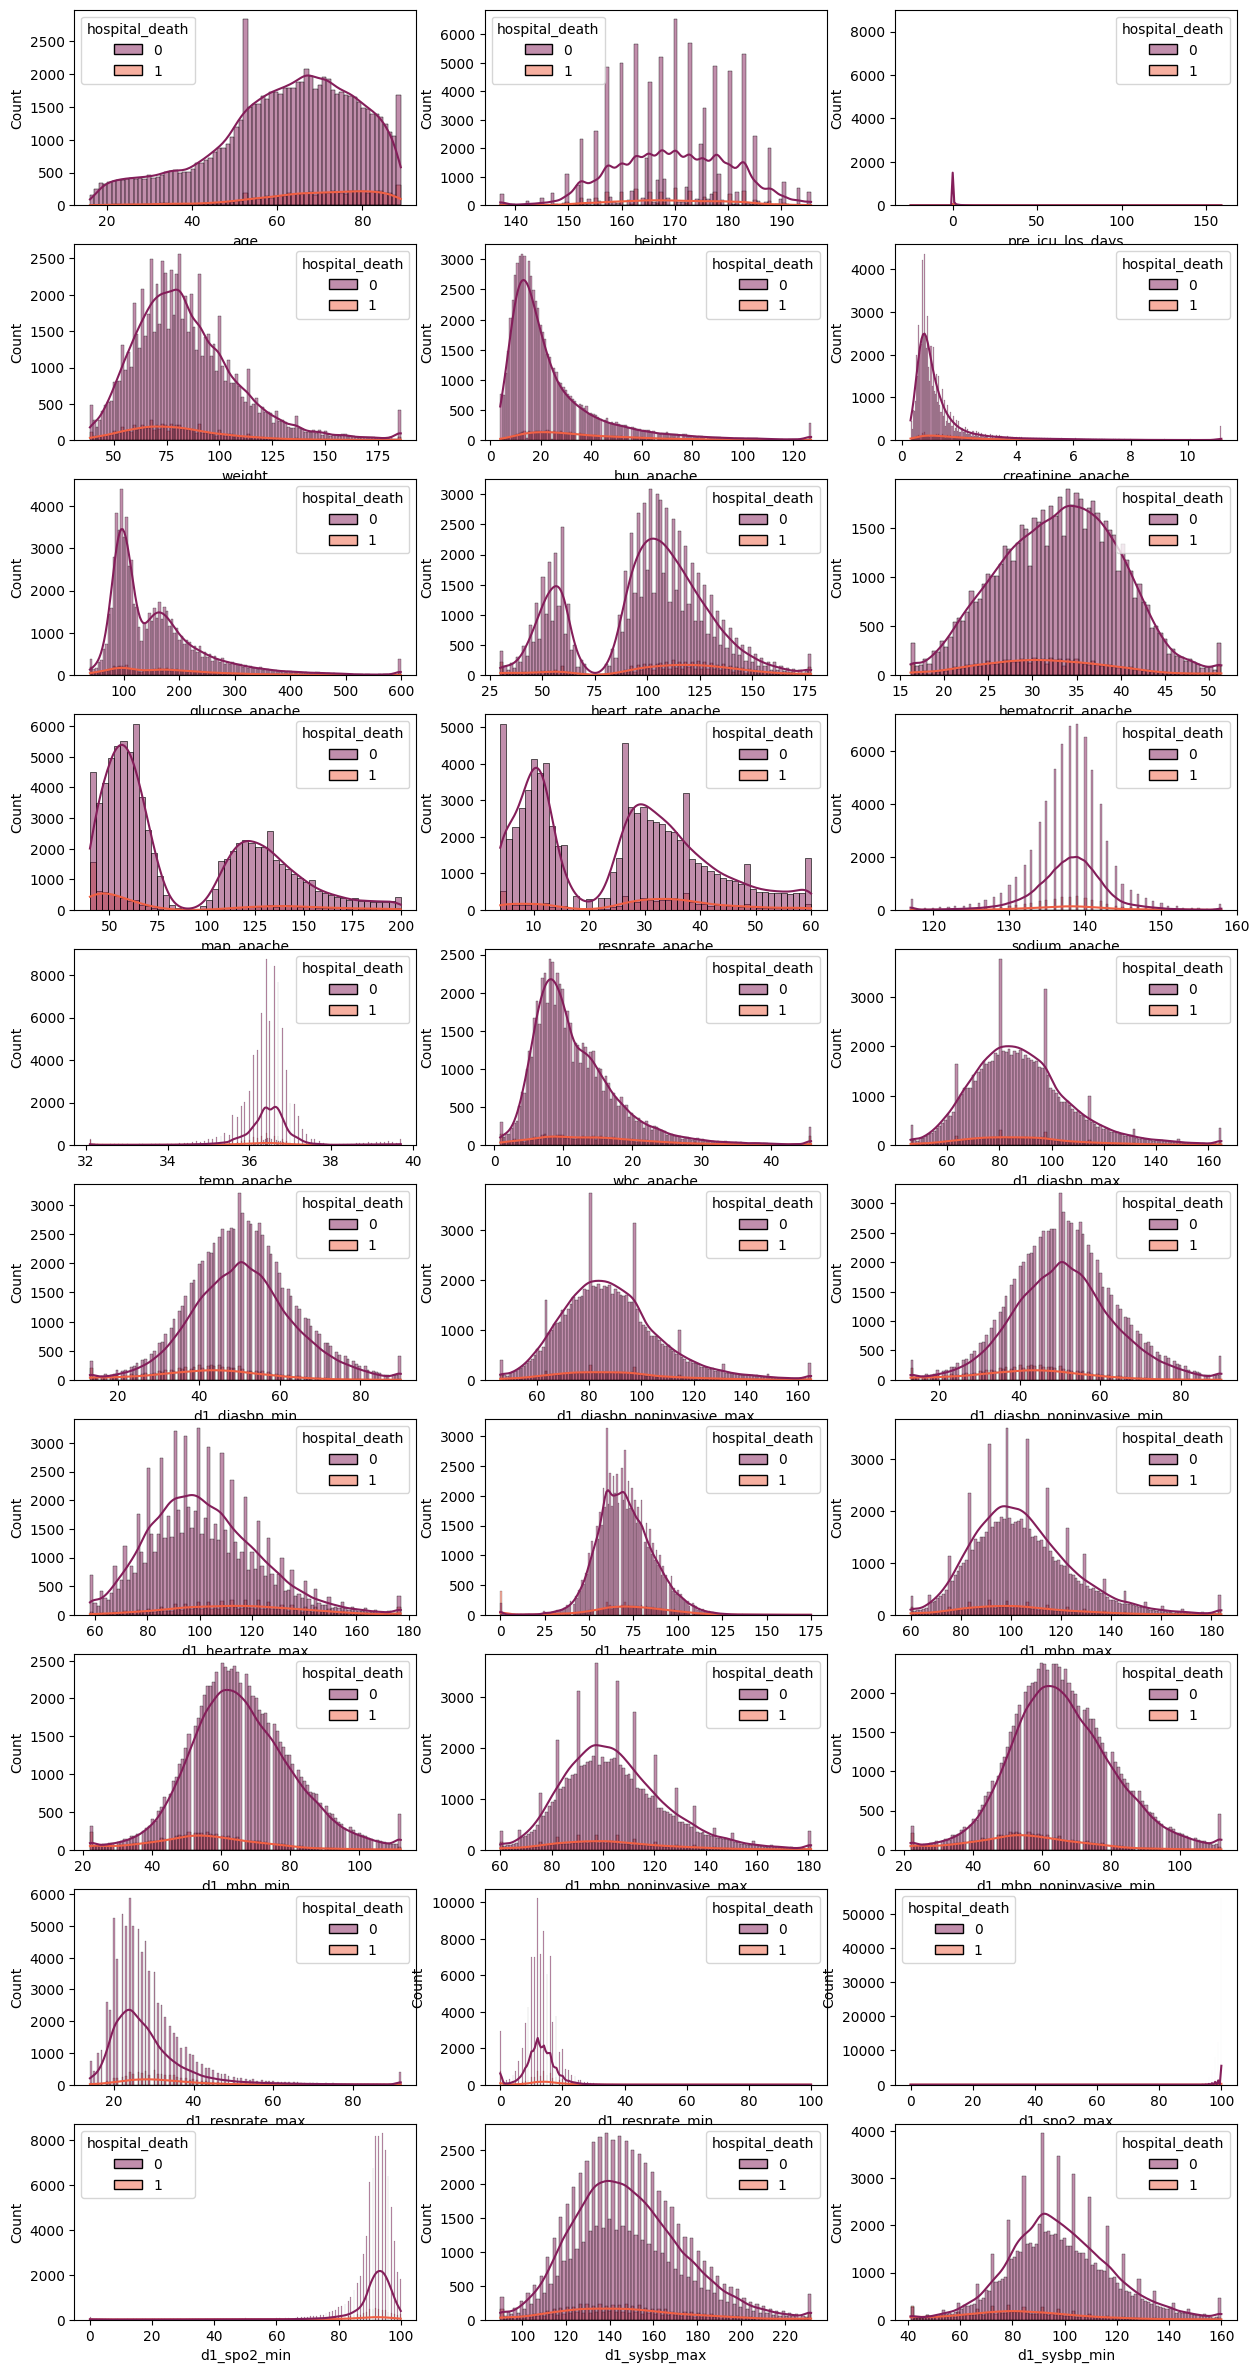

In [ ]:
# Distribution of Numerical Features
fig, axs = plt.subplots(ncols=3, nrows=10, figsize=(15, 30))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(df_cleaned, x=column, hue='hospital_death', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

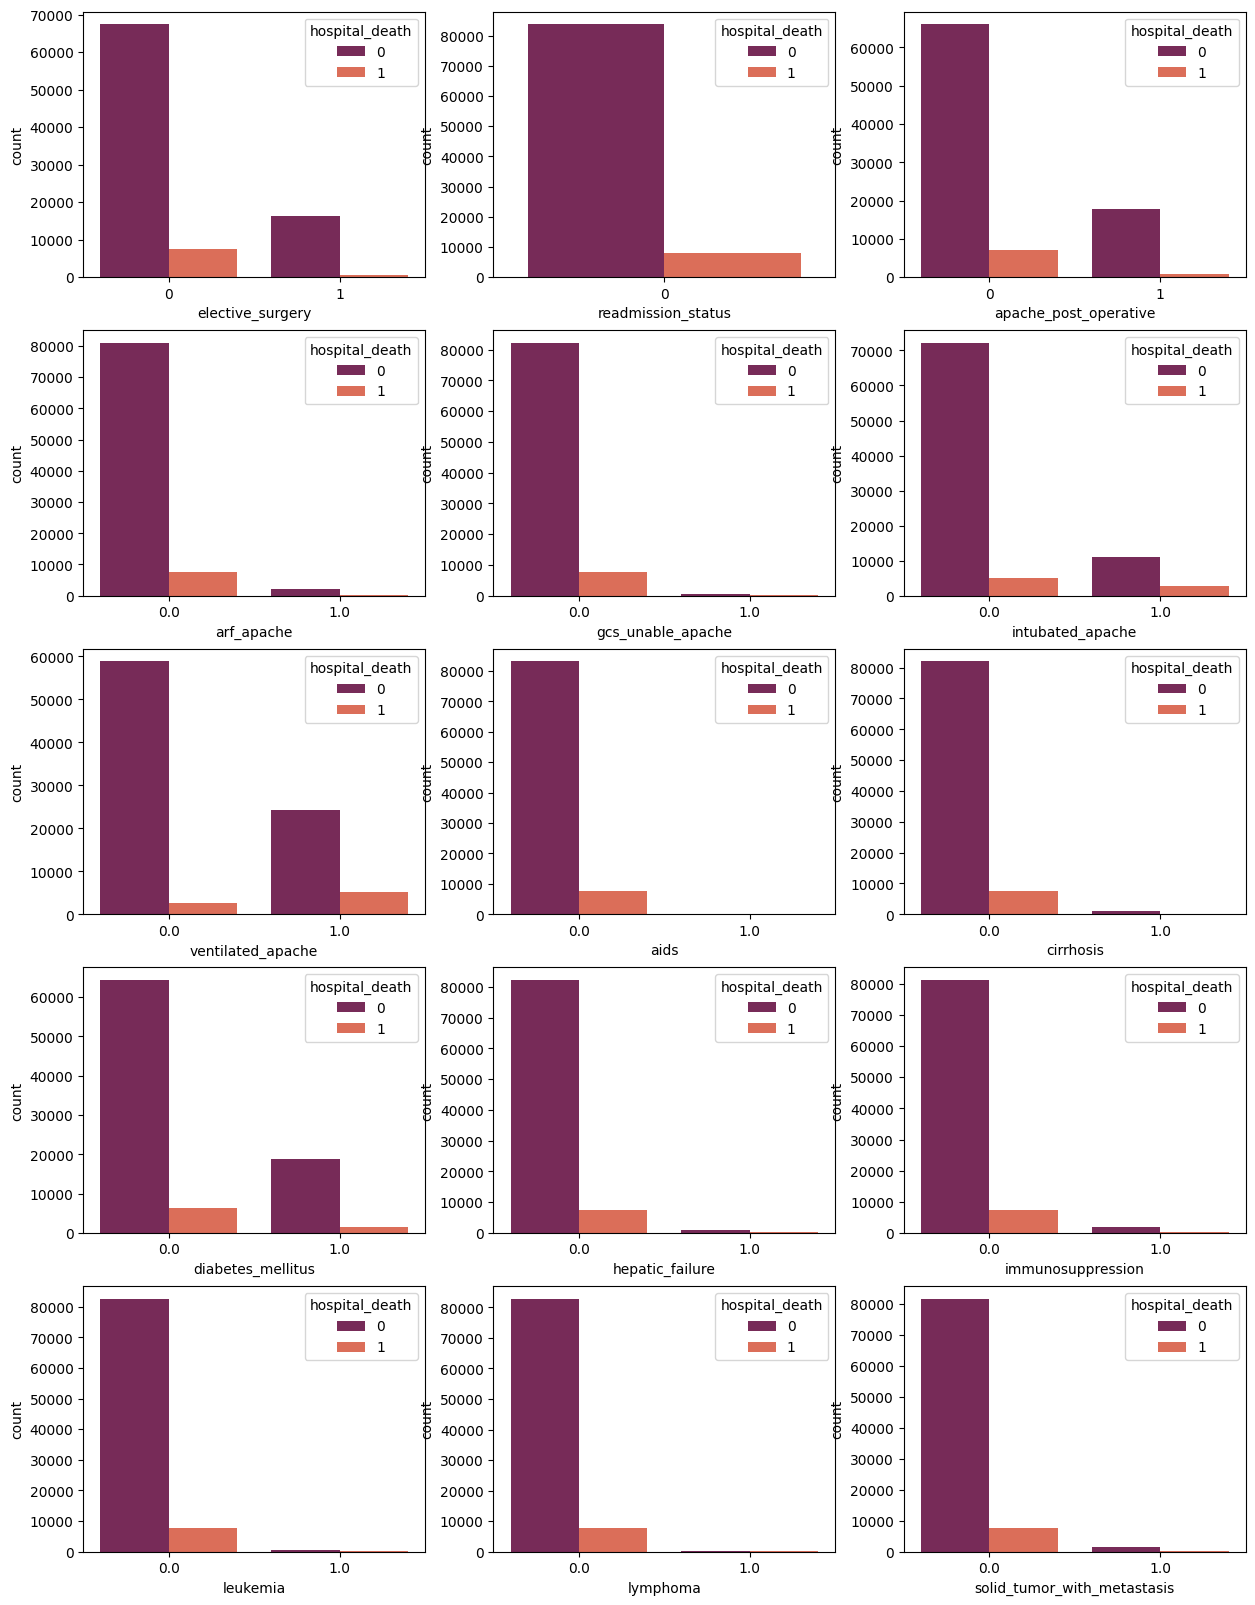

In [ ]:
# Checking the difference in the distribution of categorical features across two classes

# Initialize a 3x3 grid of subplots
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(15, 20))

# Loop through each categorical column to plot its distribution
for i, column in enumerate(binary_colums):
    # Determine the subplot's position based on the current index
    x = i // 3
    y = i % 3

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=df_cleaned, x=column, hue='hospital_death', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show() # we see imbalance in outcomes

In [ ]:
# Checking for data imbalance

import plotly.express as px

# Compute the count of each class in the 'target' column
counts = df_cleaned['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in Hospital_Death',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in Hospital_Death',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show() # we see imbalance in outcomes

<Axes: >

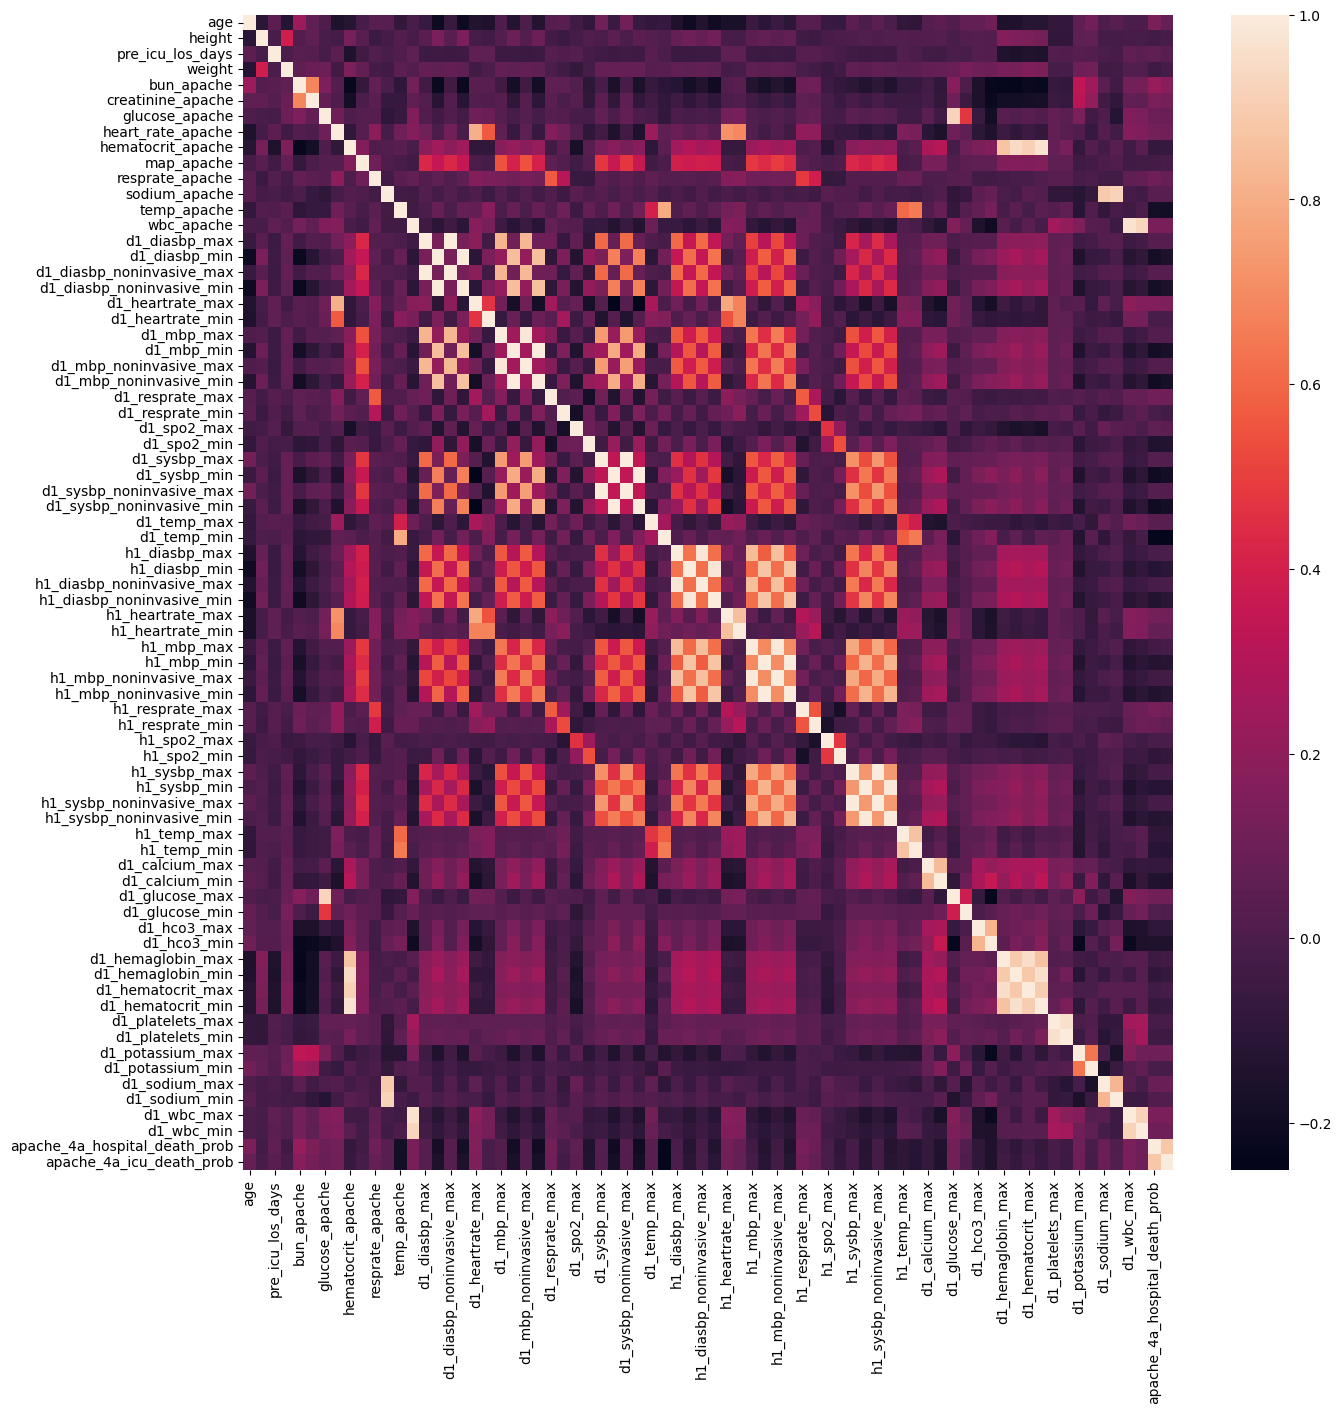

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cleaned[numerical_columns].corr())

###Cleaning categorical variables  

In [ ]:
# Clean up categorical string variables
# Ethnicity and gender

df_cleaned['ethnicity'].replace({'Caucasian' : 0, 'Hispanic' : 1,  'African American' : 2, 'Asian' : 3, 'Native American' : 4, 'Other/Unknown' : 5 }, inplace=True)
df_cleaned['gender'].replace({'M' : 0, 'F' : 1}, inplace=True)


In [ ]:
#'hospital_admit_source'
df_cleaned['hospital_admit_source'].replace({
    'Floor' : 0,
    'Emergency Department' : 1,
    'Operating Room' : 2,
    'Direct Admit' : 3,
    'Other Hospital': 4,
    'Other ICU': 5,
    'ICU to SDU': 6,
    'Recovery Room':7,
    'Chest Pain Center' : 8,
    'Step-Down Unit (SDU)': 9,
    'Acute Care/Floor':10 ,
    'PACU':11,
    'Observation':12,
    'ICU':13,
    'Other':14},
    inplace=True)

In [ ]:
# ICU admit source
df_cleaned['icu_admit_source'].replace({'Floor' : 0, 'Accident & Emergency' : 1,  'Operating Room / Recovery' : 2, 'Other Hospital' : 3, 'Other ICU' : 4}, inplace=True)

In [ ]:
# ICU stay type
unique_entries = df_cleaned['icu_stay_type'].unique()
print("Unique entries in 'icu_stay_type':")
for entry in unique_entries:
    print(entry)

Unique entries in 'icu_stay_type':
admit
readmit
transfer


In [ ]:
df_cleaned['icu_stay_type'].replace({'admit' : 0, 'readmit' : 1,  'Operating Room / Recovery' : 2, 'transfer' : 3}, inplace=True)

In [ ]:
# ICU type
df_cleaned['icu_type'].replace({"CTICU" :0, "Med-Surg ICU" :1, "CCU-CTICU":2, "Neuro ICU":3, "MICU":4, "SICU":5, "Cardiac ICU":6, "CSICU":7}, inplace=True)

In [ ]:
# APACHE body system
df_cleaned['apache_3j_bodysystem'].replace({"Sepsis":0, "Respiratory":1, "Metabolic":2, "Cardiovascular":3, "Trauma":4, "Neurological":5, "Gastrointestinal":6, "Genitourinary":7, "Hematological":8, "Musculoskeletal/Skin":9, "Gynecological":10}, inplace=True)

In [ ]:
unique_entries = df_cleaned['apache_2_bodysystem'].unique()
print("Unique entries in 'apache_2_bodysystem':")
for entry in unique_entries:
    print(entry)

Unique entries in 'apache_2_bodysystem':
Cardiovascular
Respiratory
Metabolic
Trauma
Neurologic
Gastrointestinal
Renal/Genitourinary
nan
Undefined diagnoses
Haematologic
Undefined Diagnoses


In [ ]:
df_cleaned['apache_2_bodysystem'].replace({'Cardiovascular':0, "Respiratory":1, "Metabolic":2, "Trauma":3, "Neurologic":4, "Gastrointestinal":5, "Renal/Genitourinary":6, "Undefined diagnoses":7, "Haematologic":8, "Undefined Diagnoses":9}, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)  # Display all columns
df_cleaned.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,0.0,0.0,180.3,0.0,0.0,92,0,0,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.0,27.42,0,0.0,1.0,160.0,0.0,0.0,90,0,1,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,119783,50777,118,0,25.0,31.95,0,0.0,1.0,172.7,1.0,1.0,93,0,1,0.000694,0,95.3,122.0,703.03,0,0.0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,0.0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,79267,46918,118,0,81.0,22.64,1,0.0,1.0,165.1,2.0,2.0,92,0,0,0.000694,0,61.7,203.0,1206.03,1,0.0,NaN,NaN,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,4.0,NaN,34.8,1.0,8.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,35.6,34.8,NaN,NaN,NaN,NaN,NaN,NaN,185.0,88.0,NaN,NaN,11.6,8.9,34.0,25.9,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,92056,34377,33,0,19.0,NaN,0,0.0,0.0,188.0,NaN,1.0,91,0,1,0.073611,0,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.

# Reduced dataset
- Keeping demographics and APACHE variables

## Variable selection

In [ ]:
#dropping all of the lab and vital variables
#remove Encounter id, Patient id and hospital id - since they are not meaningful to the analysis
#also removed bmi since height and weight are already in the data set

# Specify the columns you want to remove in a list
columns_to_remove = [
"d1_diasbp_max",
"d1_diasbp_min",
"d1_diasbp_noninvasive_max",
"d1_diasbp_noninvasive_min",
"d1_heartrate_max",
"d1_heartrate_min",
"d1_mbp_max",
"d1_mbp_min",
"d1_mbp_noninvasive_max",
"d1_mbp_noninvasive_min",
"d1_resprate_max",
"d1_resprate_min",
"d1_spo2_max",
"d1_spo2_min",
"d1_sysbp_max",
"d1_sysbp_min",
"d1_sysbp_noninvasive_max",
"d1_sysbp_noninvasive_min",
"d1_temp_max",
"d1_temp_min",
"h1_diasbp_max",
"h1_diasbp_min",
"h1_diasbp_noninvasive_max",
"h1_diasbp_noninvasive_min",
"h1_heartrate_max",
"h1_heartrate_min",
"h1_mbp_max",
"h1_mbp_min",
"h1_mbp_noninvasive_max",
"h1_mbp_noninvasive_min",
"h1_resprate_max",
"h1_resprate_min",
"h1_spo2_max",
"h1_spo2_min",
"h1_sysbp_max",
"h1_sysbp_min",
"h1_sysbp_noninvasive_max",
"h1_sysbp_noninvasive_min",
"h1_temp_max",
"h1_temp_min",
"d1_bun_max",
"d1_bun_min",
"d1_calcium_max",
"d1_calcium_min",
"d1_creatinine_max",
"d1_creatinine_min",
"d1_glucose_max",
"d1_glucose_min",
"d1_hco3_max",
"d1_hco3_min",
"d1_hemaglobin_max",
"d1_hemaglobin_min",
"d1_hematocrit_max",
"d1_hematocrit_min",
"d1_platelets_max",
"d1_platelets_min",
"d1_potassium_max",
"d1_potassium_min",
"d1_sodium_max",
"d1_sodium_min",
"d1_wbc_max",
"d1_wbc_min",
'apache_4a_hospital_death_prob',
'apache_4a_icu_death_prob',
'encounter_id', 'patient_id', 'hospital_id', 'bmi'
]

# Use the drop() method to remove the specified columns
red_df_cleaned = df_cleaned.drop(columns=columns_to_remove)

In [ ]:
red_df_cleaned.head()

,hospital_death,age,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,0,0.0,0.0,180.3,0.0,0.0,92,0,0,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,77.0,0,0.0,1.0,160.0,0.0,0.0,90,0,1,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0,25.0,0,0.0,1.0,172.7,1.0,1.0,93,0,1,0.000694,0,95.3,122.0,703.03,0,0.0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,0,81.0,1,0.0,1.0,165.1,2.0,2.0,92,0,0,0.000694,0,61.7,203.0,1206.03,1,0.0,NaN,NaN,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,4.0,NaN,34.8,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,0,19.0,0,0.0,0.0,188.0,NaN,1.0,91,0,1,0.073611,0,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,16.0,NaN,36.7,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0


In [ ]:
# Simpler naming for new dataset
data=red_df_cleaned

In [ ]:
from re import I
# Categorizing columns with variables removed

target_column = ['hospital_death']
categorical_colums = ['ethnicity', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_type', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'apache_3j_bodysystem', 'apache_2_bodysystem' ]
binary_colums = ["elective_surgery", 'gender', 'icu_stay_type', "readmission_status", "apache_post_operative", "arf_apache", "gcs_unable_apache", "intubated_apache", "ventilated_apache"]
comorbidities_colums = ["aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
numerical_columns = [i for i in data.columns if i not in integer_columns + target_column + binary_colums + numerical_columns]

In [ ]:
data['ethnicity'] = data['ethnicity'].fillna(6)

##ML pipeline
- Cross validation
- Split train test
- Imputation
- Normalization

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("hospital_death", axis=1)

Y = data["hospital_death"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
# Analyse missingness
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = data.isnull().sum()
missing_value_counts

hospital_death                     0
age                             4228
elective_surgery                   0
ethnicity                          0
gender                            25
height                          1334
hospital_admit_source          21409
icu_admit_source                 112
icu_id                             0
icu_stay_type                      0
icu_type                           0
pre_icu_los_days                   0
readmission_status                 0
weight                          2720
apache_2_diagnosis              1662
apache_3j_diagnosis             1101
apache_post_operative              0
arf_apache                       715
bun_apache                     19262
creatinine_apache              18853
gcs_eyes_apache                 1901
gcs_motor_apache                1901
gcs_unable_apache               1037
gcs_verbal_apache               1901
glucose_apache                 11036
heart_rate_apache                878
hematocrit_apache              19878
i

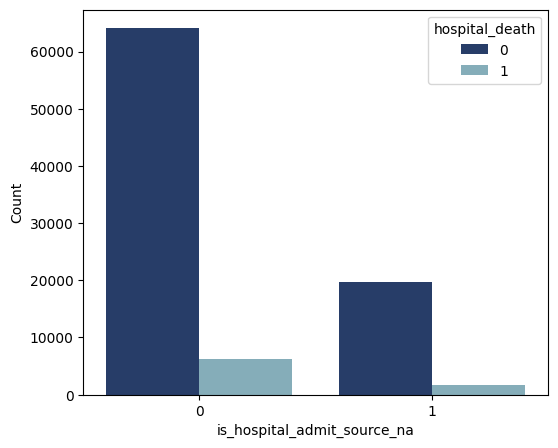

is_hospital_admit_source_na
0    70304
1    21409
Name: hospital_death, dtype: int64


In [ ]:
#Is the data missing at random?

# Create a binary indicator column 'is_ethnicity_na' to represent missing values in the 'hospital_admit_source' column
data['is_hospital_admit_source_na'] = data['hospital_admit_source'].isna().astype(int)

# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='is_hospital_admit_source_na', hue='hospital_death', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_hospital_admit_source_na')
plt.ylabel('Count')
plt.legend(title='hospital_death')
plt.show()

print(data.groupby('is_hospital_admit_source_na')['hospital_death'].count())

# Remove the column from the DataFrame
data.drop('is_hospital_admit_source_na', axis=1, inplace=True)

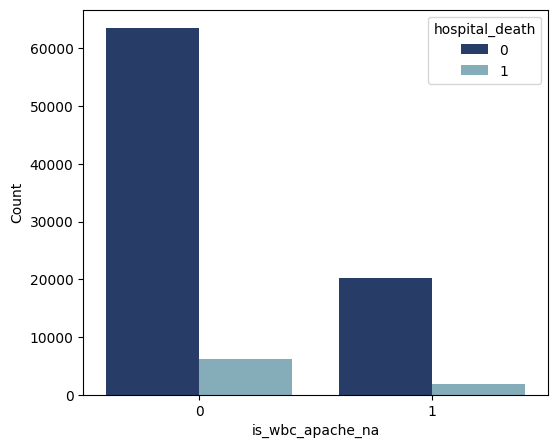

is_wbc_apache_na
0    69701
1    22012
Name: hospital_death, dtype: int64


In [ ]:
# Create a binary indicator to represent missing values in the 'wbc_apache' column
data['is_wbc_apache_na'] = data['wbc_apache'].isna().astype(int)

# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='is_wbc_apache_na', hue='hospital_death', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_wbc_apache_na')
plt.ylabel('Count')
plt.legend(title='hospital_death')
plt.show()

print(data.groupby('is_wbc_apache_na')['hospital_death'].count())

# Remove the column from the DataFrame
data.drop('is_wbc_apache_na', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# Splitting
X = data.drop("hospital_death", axis=1)
Y = data["hospital_death"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) #can change to 20% as needed

# Cross validation
kf = StratifiedKFold(n_splits = 5)
for train_index, valid_index in kf.split(X_train, Y_train):
  X_train_data, X_valid_data = (X_train.iloc[train_index]), (X_train.iloc[valid_index])
  Y_train_data, Y_valid_data = (Y_train.iloc[train_index]), (Y_train.iloc[valid_index])

# Imputation of Missing Values
#for most binary variables of comorbidities
X_train_data[comorbidities_colums] = X_train_data[comorbidities_colums].fillna(0)
X_valid_data[comorbidities_colums] = X_valid_data[comorbidities_colums].fillna(0)

#set min_value = 0 because it is imputing negative numbers which cannot exist in our dataset
imputer_bayes = IterativeImputer(max_iter=10, random_state=1, min_value=0)
X_train_data_imputed = imputer_bayes.fit_transform(X_train_data)
X_valid_data_imputed = imputer_bayes.transform(X_valid_data)

# Standardize
st_x = StandardScaler()
X_train_data_imputed_st = st_x.fit_transform(X_train_data_imputed)
X_valid_data_imputed_st = st_x.fit_transform(X_valid_data_imputed)

# Neural network with reduced dataset

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

# number of variables for X
print(X_train_data_imputed_st.shape)

(51360, 43)


In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((43, hidden_units_layer_1), requires_grad=True) # 43 variables
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

## Forward pass function

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

## Training with 1000 epochs


In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train_data_imputed_st).type(t.float32)
Y = t.Tensor(Y_train_data).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 1000
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

### Visualize training loss over epochs

Text(0, 0.5, 'loss')

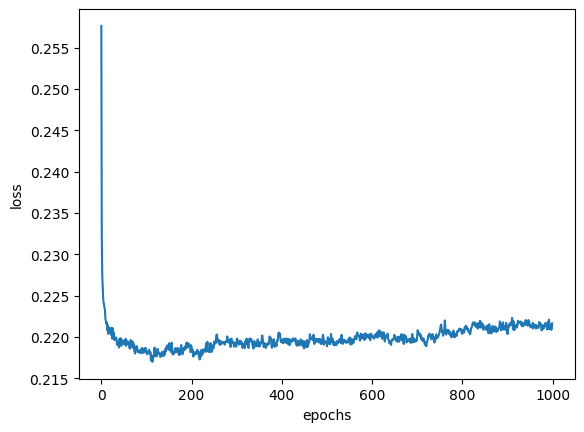

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss') # need to run btwn 0-750 bc lowest lost in the beginning but add regularization to check

## Training with 200 epochs

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train_data_imputed_st).type(t.float32)
Y = t.Tensor(Y_train_data).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 200
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 100 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

### Visualize training loss over epochs

Text(0, 0.5, 'loss')

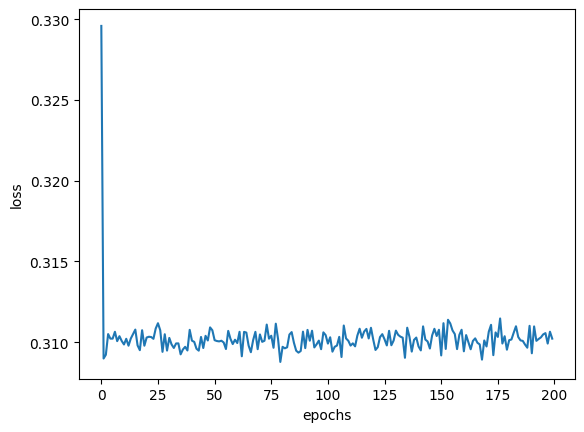

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss') # epoch around 125 is lowest loss

In [ ]:
# Evaluate Model Performance on Validation Data
# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_valid_data_imputed_st).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_valid_data.to_numpy()).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train_data_imputed_st).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train_data.to_numpy()).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item()) # results suggest that validation is slightly higher than training therefore regularization is needed to prevent overfitting
    # ratio between validation and training is 1.05

## L2 regularization and drop-out regularization

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 43
number_of_hidden_units = 5
epochs = 200
learning_rate = 0.01
batch_size = 32
landa = 0.01  # Regularization term (lambda)
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Prepare the data
X_train_tensor = t.Tensor(X_train_data_imputed_st).type(t.float32)
Y_train_tensor = t.Tensor(Y_train_data.to_numpy()).type(t.float32)

X_valid_tensor = t.Tensor(X_valid_data_imputed_st).type(t.float32)
Y_valid_tensor = t.Tensor(Y_valid_data.to_numpy()).type(t.float32) # error in series in y test but not x test

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
recall_list = []
f1_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_valid_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_valid_tensor).type(t.float32).mean().item()
        recall = recall_score(Y_valid_tensor, prediction)
        f1 = f1_score(Y_valid_tensor, prediction)


        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}, Validation recall :{recall}, Validation F1 :{f1}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)
        recall_list.append(recall)
        f1_list.append(f1)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/200 ---> Train Accuracy: 0.9169781804084778, Validation Accuracy: 0.9161928296089172, Validation recall :0.04185623293903549, Validation F1 :0.07876712328767123
Epoch 1/200 ---> Train Accuracy: 0.914758563041687, Validation Accuracy: 0.9145572185516357, Validation recall :0.006369426751592357, Validation F1 :0.012601260126012603
Epoch 2/200 ---> Train Accuracy: 0.9143107533454895, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 3/200 ---> Train Accuracy: 0.914330244064331, Validation Accuracy: 0.9144793152809143, Validation recall :0.0009099181073703367, Validation F1 :0.0018181818181818182
Epoch 4/200 ---> Train Accuracy: 0.9143496751785278, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 5/200 ---> Train Accuracy: 0.9143691658973694, Validation Accuracy: 0.9142456650733948, Validation recall :0.0009099181073703367, Validation F1 :0.001813236627379873
Epoch 6/200 ---> Train Accuracy: 0.91507011

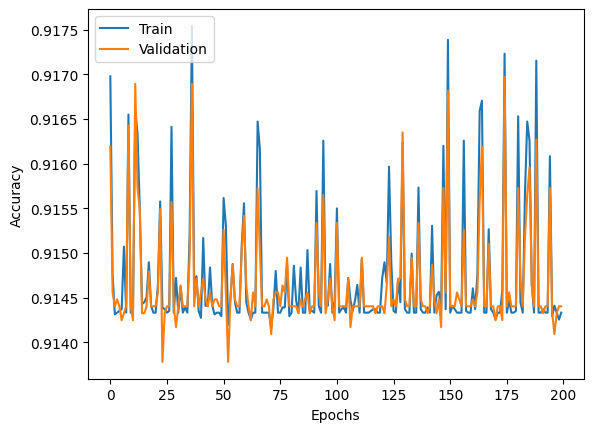

Average accuracy: 0.915


In [ ]:
# Plot training and validation accuracy over 200 epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Average accuracy in validation
print('Average accuracy:',round(sum(validation_accuracy_list)/len(validation_accuracy_list), 3))

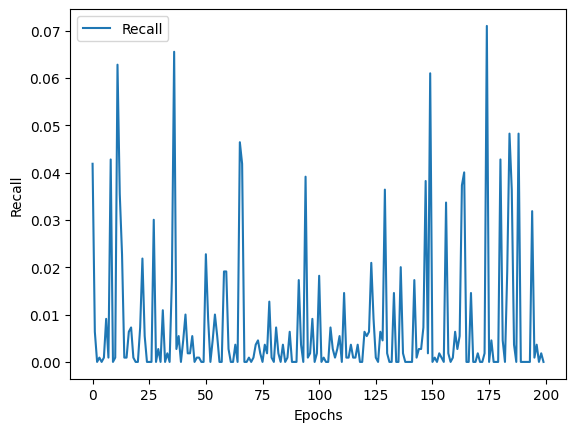

Average recall: 0.008


In [ ]:
# Plot recall over epochs
plt.plot([i for i in range(len(recall_list))], recall_list, label="Recall")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

# Average recall in validation
print('Average recall:',round(sum(recall_list)/len(recall_list), 3))

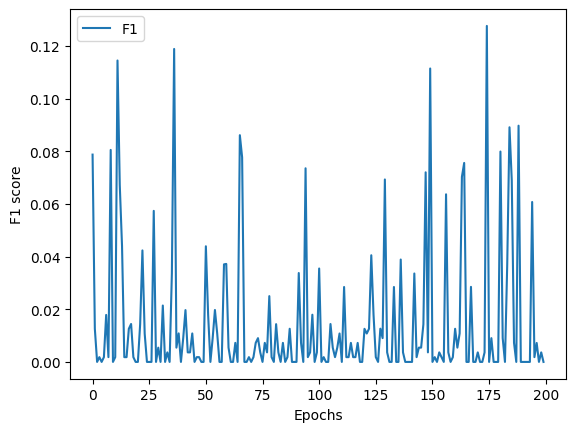

Average F1: 0.015


In [ ]:
# Plot F1 over epochs
plt.plot([i for i in range(len(f1_list))], f1_list, label="F1")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.show()

# Average F1 in validation
print('Average F1:',round(sum(f1_list)/len(f1_list), 3))

#ML pipeline for full dataset
(not including variables over 50% missing)

In [ ]:
remove = ['apache_4a_hospital_death_prob',
'apache_4a_icu_death_prob','encounter_id', 'patient_id', 'hospital_id', 'bmi']

data2 = df_cleaned.drop(columns=remove)


In [ ]:
from re import I
# Categorizing Columns with veribales not removed

target_column = ['hospital_death']
categorical_colunms = ['ethnicity', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_type', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'apache_3j_bodysystem', 'apache_2_bodysystem' ]
binary_columns = ["elective_surgery", 'gender', 'icu_stay_type', "readmission_status", "apache_post_operative", "arf_apache", "gcs_unable_apache", "intubated_apache", "ventilated_apache"]
comorbidities_colunms = ["aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]


numerical_columns = [i for i in data2.columns if i not in target_column + binary_colums + categorical_colunms + comorbidities_colunms]

In [ ]:
numerical_columns

['age',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'bun_apache',
 'creatinine_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_s

In [ ]:
pd.set_option('display.max_rows', None)  # Display all rows

In [ ]:
#Analyse missingness
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = data2.isnull().sum()
missing_value_counts

hospital_death                     0
age                             4228
elective_surgery                   0
ethnicity                       1395
gender                            25
height                          1334
hospital_admit_source          21409
icu_admit_source                 112
icu_id                             0
icu_stay_type                      0
icu_type                           0
pre_icu_los_days                   0
readmission_status                 0
weight                          2720
apache_2_diagnosis              1662
apache_3j_diagnosis             1101
apache_post_operative              0
arf_apache                       715
bun_apache                     19262
creatinine_apache              18853
gcs_eyes_apache                 1901
gcs_motor_apache                1901
gcs_unable_apache               1037
gcs_verbal_apache               1901
glucose_apache                 11036
heart_rate_apache                878
hematocrit_apache              19878
i

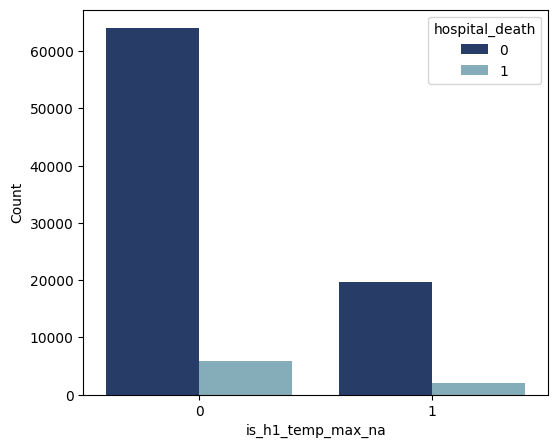

is_h1_temp_max_na
0    69981
1    21732
Name: hospital_death, dtype: int64


In [ ]:
#Quickly checking missingness for numerical veriables
# Create a binary indicator to represent missing values in the 'h1_temp_max' column
data2['is_h1_temp_max_na'] = data2['h1_temp_max'].isna().astype(int)

# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data2, x='is_h1_temp_max_na', hue='hospital_death', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_h1_temp_max_na')
plt.ylabel('Count')
plt.legend(title='hospital_death')
plt.show()

print(data2.groupby('is_h1_temp_max_na')['hospital_death'].count())

# Remove the column from the DataFrame
data2.drop('is_h1_temp_max_na', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# Splitting
X2 = data2.drop("hospital_death", axis=1)
Y2 = data2["hospital_death"]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1) #can change to 20% as needed

# Cross validation
kf = StratifiedKFold(n_splits = 5)
for train_index, valid_index in kf.split(X2_train, Y2_train):
  X2_train_data, X2_valid_data = X2_train.iloc[train_index], X2_train.iloc[valid_index]
  Y2_train_data, Y2_valid_data = Y2_train.iloc[train_index], Y2_train.iloc[valid_index]

# Imputation of Missing Values
X2_train_data[comorbidities_colums] = X2_train_data[comorbidities_colums].fillna(0)
X2_valid_data[comorbidities_colums] = X2_valid_data[comorbidities_colums].fillna(0)

#Mean imputation for numeric columns
X2_train_data[numerical_columns] = X2_train_data[numerical_columns].fillna(X2_train_data[numerical_columns].mean())
X2_valid_data[numerical_columns] = X2_valid_data[numerical_columns].fillna(X2_train_data[numerical_columns].mean())

#Mode imputation for binary_columns
#Iterate over the categorical columns and fill missing values with the mode
for column in categorical_colunms:
    mode_value = X2_train_data[column].mode().iloc[0]  # Get the mode value from the Series
    X2_train_data[column].fillna(mode_value, inplace=True)
for column in categorical_colunms:
    mode_value = X2_valid_data[column].mode().iloc[0]  # Get the mode value from the Series
    X2_valid_data[column].fillna(mode_value, inplace=True)
for column in binary_columns:
    mode_value = X2_train_data[column].mode().iloc[0]  # Get the mode value from the Series
    X2_train_data[column].fillna(mode_value, inplace=True)
for column in binary_columns:
    mode_value = X2_valid_data[column].mode().iloc[0]  # Get the mode value from the Series
    X2_valid_data[column].fillna(mode_value, inplace=True)

# Standardize
st_x = StandardScaler()
X2_train_data_imputed_st = st_x.fit_transform(X2_train_data)
X2_valid_data_imputed_st = st_x.fit_transform(X2_valid_data)

print(X2_train_data_imputed_st.shape)

<ipython-input-62-c32f53a22627>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_train_data[comorbidities_colums] = X2_train_data[comorbidities_colums].fillna(0)
<ipython-input-62-c32f53a22627>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_valid_data[comorbidities_colums] = X2_valid_data[comorbidities_colums].fillna(0)
<ipython-input-62-c32f53a22627>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

(51360, 105)


<ipython-input-62-c32f53a22627>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_valid_data[numerical_columns] = X2_valid_data[numerical_columns].fillna(X2_train_data[numerical_columns].mean())
<ipython-input-62-c32f53a22627>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_train_data[column].fillna(mode_value, inplace=True)
<ipython-input-62-c32f53a22627>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

# Neural network with full dataset

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

# number of variables for X
print(X2_train_data_imputed_st.shape)

(51360, 105)


In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((105, hidden_units_layer_1), requires_grad=True) # 43 variables
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

## Forward pass function

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

## Training

In [ ]:
# Convert the training data to PyTorch tensors
X= t.Tensor(X2_train_data_imputed_st).type(t.float32)
Y = t.Tensor(Y2_train_data).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 1000
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

### Visualize training loss over epochs

Text(0, 0.5, 'loss')

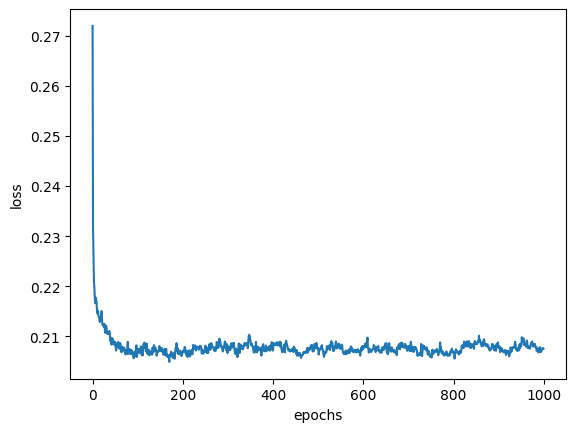

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss') # need to run btwn 0-750 bc lowest lost in the beginning but add regularization to check

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X2_valid_data_imputed_st).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_valid_data.to_numpy()).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X2_train_data_imputed_st).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y2_train_data.to_numpy()).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item()) # regularization needed
    # ratio between validation and training is 0.997

0.8999606966972351
0.9024839997291565


## L2 regularization and drop-out regularization

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 105
number_of_hidden_units = 5
epochs = 200
learning_rate = 0.01
batch_size = 32
landa = 0.01  # Regularization term (lambda)
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Prepare the data
X2_train_tensor = t.Tensor(X2_train_data_imputed_st).type(t.float32)
Y2_train_tensor = t.Tensor(Y2_train_data.to_numpy()).type(t.float32)

X2_valid_tensor = t.Tensor(X2_valid_data_imputed_st).type(t.float32)
Y2_valid_tensor = t.Tensor(Y2_valid_data.to_numpy()).type(t.float32) # error in series in y test but not x test

train_dataset2 = TensorDataset(X2_train_tensor, Y2_train_tensor)
train_data_loader2 = DataLoader(train_dataset2, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list_full = []
validation_accuracy_list_full = []
train_loss_list_full = []
recall_list_full = []
f1_list_full = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs2 = model(X2_train_tensor)
        prediction2 = (probs2 >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy_full = (prediction2 == Y2_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs2 = model(X2_valid_tensor)
        prediction2 = (probs2 >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy_full = (prediction == Y2_valid_tensor).type(t.float32).mean().item()
        recall_full = recall_score(Y2_valid_tensor, prediction2)
        f1_full = f1_score(Y2_valid_tensor, prediction2)


        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy_full}, Validation Accuracy: {validation_accuracy_full}, Validation recall :{recall_full}, Validation F1 :{f1_full}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list_full.append(train_accuracy_full)
        validation_accuracy_list_full.append(validation_accuracy_full)
        recall_list_full.append(recall_full)
        f1_list_full.append(f1_full)

    # Calculate and append the average loss for the epoch
    train_loss_list_full.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/200 ---> Train Accuracy: 0.914330244064331, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 1/200 ---> Train Accuracy: 0.914330244064331, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 2/200 ---> Train Accuracy: 0.914330244064331, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 3/200 ---> Train Accuracy: 0.914330244064331, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 4/200 ---> Train Accuracy: 0.914330244064331, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 5/200 ---> Train Accuracy: 0.914330244064331, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 6/200 ---> Train Accuracy: 0.914330244064331, Validation Accuracy: 0.9144014120101929, Validation recall :0.0, Validation F1 :0.0
Epoch 7/200 ---> Train Accuracy: 0.9143302440643

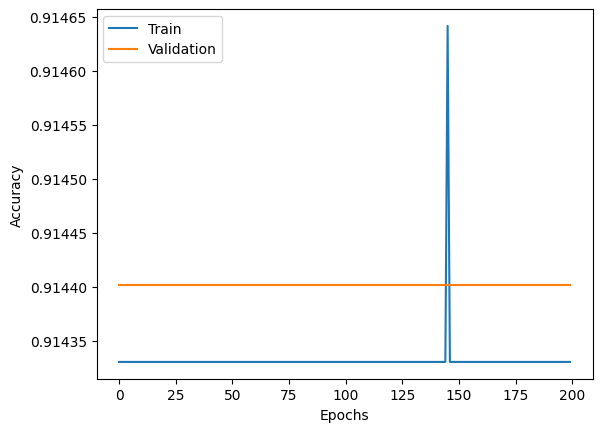

0.914

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list_full))], train_accuracy_list_full, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list_full))], validation_accuracy_list_full, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Average accuracy in validation
round(sum(validation_accuracy_list_full)/len(validation_accuracy_list_full), 3)

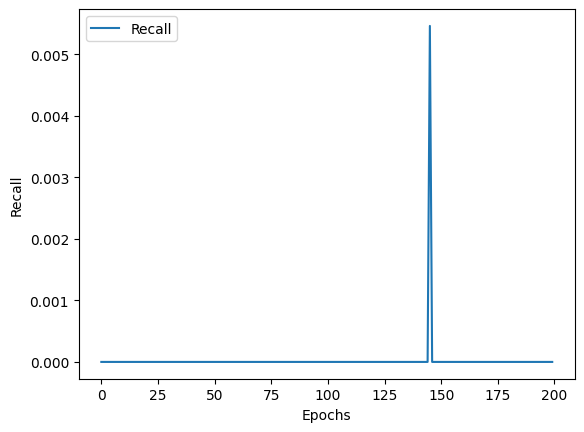

Average recall: 0.0


In [ ]:
# Plot recall over epochs
plt.plot([i for i in range(len(recall_list_full))], recall_list_full, label="Recall")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

# Average recall in validation
print('Average recall:',round(sum(recall_list_full)/len(recall_list_full), 3))

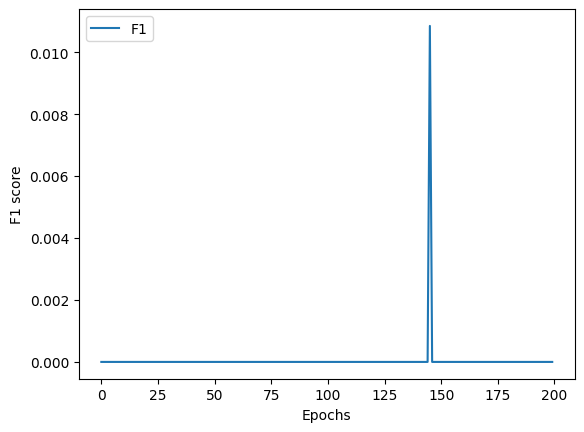

Average F1: 0.0


In [ ]:
# Plot F1 over epochs
plt.plot([i for i in range(len(f1_list_full))], f1_list_full, label="F1")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.show()

# Average F1 in validation
print('Average F1:',round(sum(f1_list_full)/len(f1_list_full), 3))